# 데이터 전처리

In [3]:
import pandas as pd
import warnings

# openpyxl 모듈의 특정 경고 무시
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# 주어진 경로에서 데이터를 읽고 표시하는 함수
def read_and_display_excel(path, header=1):
    df = pd.read_excel(path, header=header)
    return df

# 파일 경로 목록
all_files = [
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2008-2010_시군구_경제활동인구_총괄.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2010-2012_시군구_경제활동인구_총괄.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2013-2024_시군구_경제활동인구_총괄.xlsx'
]

# 각 파일에 대해 데이터를 읽고 표시
dfs = [read_and_display_excel(file) for file in all_files]
# Shape of dataframe 0: (3, 15)
# Shape of dataframe 1: (9, 15)
# Shape of dataframe 2: (23, 15)

# 성남시와 고양시의 특정 열 추출
df_seongnam = dfs[0].iloc[:, :8]
df_goyang = dfs[0].iloc[:, 8:]
df_goyang.insert(0, '시점', dfs[0]['시점'])

# 고양시와 성남시 데이터 분할 및 병합
for df in dfs[1:]:
    df_seongnam_temp = df.iloc[:, :8]
    df_goyang_temp = df.iloc[:, 8:]
    df_goyang_temp.insert(0, '시점', df['시점'])
    
    df_seongnam = pd.concat([df_seongnam, df_seongnam_temp], ignore_index=True)
    df_goyang = pd.concat([df_goyang, df_goyang_temp], ignore_index=True)

# 시점 컬럼에서 연도만 추출하여 새로운 컬럼 추가
df_seongnam['연도'] = df_seongnam['시점'].apply(lambda x: str(x).split('.')[0])
df_goyang['연도'] = df_goyang['시점'].apply(lambda x: str(x).split('.')[0])

# 연도를 기준으로 데이터 합치기 (숫자형 데이터만 합산)
df_seongnam_grouped = df_seongnam.groupby('연도').agg({col: 'sum' for col in df_seongnam.columns if df_seongnam[col].dtype in ['int64', 'float64']}).reset_index()
df_goyang_grouped = df_goyang.groupby('연도').agg({col: 'sum' for col in df_goyang.columns if df_goyang[col].dtype in ['int64', 'float64']}).reset_index()

# '행정구역별' 컬럼 추가
df_seongnam_grouped.insert(0, '행정구역별', '성남시')
df_goyang_grouped.insert(0, '행정구역별', '고양시')

# '총 인구수' 컬럼 추가
df_seongnam_grouped.insert(2, '총 인구수', 0)
df_goyang_grouped.insert(2, '총 인구수', 0)

# 결과 확인
# display(df_seongnam.head())
# display(df_seongnam.shape)

display(df_seongnam_grouped.head())
display(df_seongnam_grouped.shape)

# display(df_goyang)
# display(df_goyang.shape)

display(df_goyang_grouped.head())
display(df_goyang_grouped.shape)


,행정구역별,연도,총 인구수,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),고용률 (%),실업률 (％)
0,성남시,2008,0,760.6,448.1,434.5,13.6,312.5,57.1,3.0
1,성남시,2009,0,774.2,452.0,440.6,11.4,322.1,56.9,2.5
2,성남시,2010,0,1579.7,885.7,860.6,25.1,694.1,108.9,5.7
3,성남시,2011,0,3180.5,1862.3,1807.1,55.3,1318.1,227.3,11.9
4,성남시,2012,0,3193.3,1943.3,1873.5,69.8,1250.0,234.7,14.5


(17, 10)

,행정구역별,연도,총 인구수,15세이상인구 (천명).1,경제활동인구 (천명).1,취업자 (천명).1,실업자 (천명).1,비경제활동인구 (천명).1,고용률 (%).1,실업률 (％).1
0,고양시,2008,0,714.9,419.0,409.3,9.7,295.9,57.2,2.3
1,고양시,2009,0,726.0,412.1,401.0,11.1,314.0,55.2,2.7
2,고양시,2010,0,1471.6,810.7,788.5,22.1,661.0,107.1,5.5
3,고양시,2011,0,2987.1,1743.1,1705.1,38.2,1244.1,228.3,8.7
4,고양시,2012,0,3035.8,1759.7,1708.0,51.7,1276.1,225.0,11.8


(17, 10)

In [5]:
# 파일 경로 목록
population_files = [
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\200801_201212_고양시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201301_201712_고양시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201801_202212_고양시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\202301_202410_고양시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\200801_201212_성남시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201301_201712_성남시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201801_202212_성남시_주민등록인구및세대현황_월간.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\202301_202410_성남시_주민등록인구및세대현황_월간.xlsx'
]

# Shape of population dataframe 0: (43, 362)
# Shape of population dataframe 1: (43, 362)
# Shape of population dataframe 2: (53, 362)
# Shape of population dataframe 3: (48, 134)
# Shape of population dataframe 4: (55, 362)
# Shape of population dataframe 5: (54, 362)
# Shape of population dataframe 6: (54, 362)
# Shape of population dataframe 7: (54, 134)

# 모든 파일을 읽어서 데이터프레임 리스트로 저장
population_dfs = [pd.read_excel(file, header=2) for file in population_files]

# 모든 데이터프레임을 병합
merged_population_df = pd.concat(population_dfs, ignore_index=True)

# 행정기관 컬럼에서 경기도 고양시, 경기도 성남시만 필터링
merged_population_df['행정기관'] = merged_population_df['행정기관'].str.strip()
filtered_population_df = merged_population_df[merged_population_df['행정기관'].isin(['경기도 고양시','경기도 성남시'])]

display(filtered_population_df.head(8))


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,총인구수.1,세대수.1,...,세대당 인구.58,남자 인구수.58,여자 인구수.58,남여 비율.58,총인구수.59,세대수.59,세대당 인구.59,남자 인구수.59,여자 인구수.59,남여 비율.59
0,4128000000,경기도 고양시,"926,283","346,729",2.67,"457,818","468,465",0.98,"927,732","347,533",...,2.65,"477,287","490,506",0.97,"969,916","365,492",2.65,"478,333","491,583",0.97
43,4128000000,경기도 고양시,"971,569","366,046",2.65,"479,096","492,473",0.97,"972,897","366,514",...,2.55,"511,644","530,421",0.96,"1,041,983","408,816",2.55,"511,564","530,419",0.96
86,4128000000,경기도 고양시,"1,041,597","409,202",2.55,"511,344","530,253",0.96,"1,041,430","409,713",...,2.33,"524,999","550,203",0.95,"1,076,535","461,459",2.33,"525,741","550,794",0.95
139,4128000000,경기도 고양시,"1,077,599","462,030",2.33,"526,192","551,407",0.95,"1,078,087","462,873",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,4113000000,경기도 성남시,"953,606","370,502",2.57,"477,078","476,528",1.00,"953,141","370,275",...,2.55,"487,622","489,680",1.00,"978,615","384,316",2.55,"488,319","490,296",1.00
242,4113000000,경기도 성남시,"979,247","384,484",2.55,"488,657","490,590",1.00,"980,548","385,038",...,2.44,"479,520","488,494",0.98,"967,510","396,403",2.44,"479,225","488,285",0.98
296,4113000000,경기도 성남시,"967,508","396,946",2.44,"479,277","488,231",0.98,"966,968","397,312",...,2.26,"455,768","464,594",0.98,"922,518","408,195",2.26,"456,882","465,636",0.98
350,4113000000,경기도 성남시,"924,087","408,915",2.26,"457,590","466,497",0.98,"924,051","409,466",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# 총인구수 컬럼만 필터링
filtered_population_df = filtered_population_df.filter(regex='총인구수')
# display(filtered_population_df.head(8))
# display(filtered_population_df.shape)

# 행 0-3, 행 4-7로 데이터 분할
goyang_population = filtered_population_df.iloc[0:4]
seongnam_population = filtered_population_df.iloc[4:8]

# 결과 확인
display(goyang_population)
display(seongnam_population)

,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,...,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
0,"926,283","927,732","928,342","929,752","931,057","931,353","931,463","933,130","935,214","936,973",...,"961,055","961,241","961,585","962,016","962,701","963,502","964,315","965,613","967,793","969,916"
43,"971,569","972,897","973,524","974,327","975,182","976,722","978,805","980,385","981,946","983,507",...,"1,040,482","1,040,608","1,040,892","1,041,375","1,041,587","1,041,507","1,041,399","1,041,706","1,042,065","1,041,983"
86,"1,041,597","1,041,430","1,041,450","1,041,751","1,042,127","1,043,365","1,043,633","1,043,406","1,043,035","1,043,129",...,"1,079,065","1,079,277","1,078,975","1,078,559","1,078,189","1,077,198","1,074,705","1,074,784","1,075,202","1,076,535"
139,"1,077,599","1,078,087","1,077,909","1,078,025","1,077,963","1,077,742","1,077,156","1,076,655","1,076,376","1,075,898",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,총인구수.10,총인구수.11,총인구수.12,총인구수.13,총인구수.14,총인구수.15,총인구수.16,총인구수.17,총인구수.18,총인구수.19,총인구수.20,총인구수.21,총인구수.22,총인구수.23,총인구수.24,총인구수.25,총인구수.26,총인구수.27,총인구수.28,총인구수.29,총인구수.30,총인구수.31,총인구수.32,총인구수.33,총인구수.34,총인구수.35,총인구수.36,총인구수.37,총인구수.38,총인구수.39,총인구수.40,총인구수.41,총인구수.42,총인구수.43,총인구수.44,총인구수.45,총인구수.46,총인구수.47,총인구수.48,총인구수.49,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
187,"953,606","953,141","951,242","950,283","949,390","948,210","947,948","946,882","945,955","944,080","943,019","942,447","941,889","943,014","942,957","944,832","946,201","947,612","949,160","952,719","955,168","956,962","959,794","962,726","966,702","970,488","971,492","971,846","971,150","970,847","971,208","971,320","971,038","979,698","979,485","980,190","981,269","981,970","981,390","980,896","980,800","980,467","980,051","979,962","979,795","979,534","979,706","979,323","979,556","979,412","978,796","978,458","978,095","977,613","977,443","977,243","977,009","977,078","977,302","978,615"
242,"979,247","980,548","980,947","980,946","980,887","980,669","980,320","979,890","979,685","979,684","979,766","979,534","980,004","980,234","979,516","978,595","978,163","978,357","978,067","977,407","976,777","975,747","974,910","974,608","974,768","974,877","974,545","973,604","972,797","972,466","971,924","971,262","970,809","969,903","969,675","971,424","973,744","975,817","976,791","977,094","977,991","978,745","979,509","979,981","979,159","977,256","974,956","974,580","974,755","975,417","974,343","974,035","973,833","973,199","972,719","972,623","971,310","969,555","968,014","967,510"
296,"967,508","966,968","965,691","964,400","963,297","962,238","960,769","958,670","957,435","955,999","954,919","954,347","953,447","952,364","950,916","949,316","948,582","947,990","946,568","945,546","944,741","943,585","942,929","942,724","942,649","942,183","941,688","941,527","940,519","939,748","938,982","940,668","941,783","941,480","940,746","940,064","939,774","938,819","934,308","932,867","931,626","931,654","931,756","931,931","931,760","931,319","931,063","930,948","931,072","930,731","929,463","928,267","927,340","926,645","925,981","924,333","920,903","920,667","920,362","922,518"
350,"924,087","924,051","923,416","923,344","922,914","921,434","919,771","918,077","917,374","917,243","918,771","919,747","919,856","919,855","919,464","918,706","917,765","917,192","916,615","915,871","914,832","914,234",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# 총인구수 컬럼만 필터링
filtered_population_df = filtered_population_df.filter(regex='총인구수')
# display(filtered_population_df.head(8))
# display(filtered_population_df.shape)

# 행 0-3, 행 4-7로 데이터 분할
goyang_population = filtered_population_df.iloc[0:4]
seongnam_population = filtered_population_df.iloc[4:8]

# 데이터 프레임을 1차원으로 변경
goyang_population_flat = goyang_population.values.flatten() # (240,)
seongnam_population_flat = seongnam_population.values.flatten() # (240,)

# NaN 제거
goyang_population_flat = goyang_population_flat[~pd.isnull(goyang_population_flat)]
seongnam_population_flat = seongnam_population_flat[~pd.isnull(seongnam_population_flat)]

# 데이터 분할
years = list(range(2008, 2028))
goyang_population_split = [goyang_population_flat[i:i + 12] for i in range(0, len(goyang_population_flat), 12)]
seongnam_population_split = [seongnam_population_flat[i:i + 12] for i in range(0, len(seongnam_population_flat), 12)]

# 데이터 프레임 생성
goyang_population_df = pd.DataFrame(goyang_population_split, index=years[:len(goyang_population_split)], columns=[f'{i+1}월' for i in range(12)])
seongnam_population_df = pd.DataFrame(seongnam_population_split, index=years[:len(seongnam_population_split)], columns=[f'{i+1}월' for i in range(12)])

# 인덱스를 컬럼으로 변환
goyang_population_df.reset_index(inplace=True)
seongnam_population_df.reset_index(inplace=True)

# 컬럼명 변경
goyang_population_df.rename(columns={'index': '연도'}, inplace=True)
seongnam_population_df.rename(columns={'index': '연도'}, inplace=True)

# 고양시, 성남시 총인구 연도별 데이터 확인
display(goyang_population_df.head())
display(goyang_population_df.shape)

display(seongnam_population_df.head())
display(seongnam_population_df.shape)

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,"926,283","927,732","928,342","929,752","931,057","931,353","931,463","933,130","935,214","936,973","938,228","938,831"
1,2009,"939,110","939,240","938,706","938,921","938,936","938,971","938,662","938,157","938,176","937,572","938,297","938,784"
2,2010,"939,497","940,639","940,982","941,737","941,724","941,876","941,569","940,340","939,815","947,127","948,658","950,115"
3,2011,"950,815","952,732","953,983","955,128","956,268","957,633","958,383","959,067","959,415","960,481","961,659","961,239"
4,2012,"961,381","961,452","961,055","961,241","961,585","962,016","962,701","963,502","964,315","965,613","967,793","969,916"


(17, 13)

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,"953,606","953,141","951,242","950,283","949,390","948,210","947,948","946,882","945,955","944,080","943,019","942,447"
1,2009,"941,889","943,014","942,957","944,832","946,201","947,612","949,160","952,719","955,168","956,962","959,794","962,726"
2,2010,"966,702","970,488","971,492","971,846","971,150","970,847","971,208","971,320","971,038","979,698","979,485","980,190"
3,2011,"981,269","981,970","981,390","980,896","980,800","980,467","980,051","979,962","979,795","979,534","979,706","979,323"
4,2012,"979,556","979,412","978,796","978,458","978,095","977,613","977,443","977,243","977,009","977,078","977,302","978,615"


(17, 13)

In [45]:
# 연도별 총인구수를 구하는 함수
def calculate_total_population(df):
    df = df.replace(',', '', regex=True).astype(float)
    total_population = df.sum(axis=1)
    return total_population

# 고양시와 성남시의 연도별 총인구수 계산
goyang_total_population = calculate_total_population(goyang_population_df.iloc[:, 1:])
seongnam_total_population = calculate_total_population(seongnam_population_df.iloc[:, 1:])

# 연도별 총인구수 데이터 프레임 생성
# 연도별 총인구수 데이터 프레임 생성
total_population_df = pd.DataFrame({
    '연도': years[:len(goyang_total_population)],
    '성남시 총인구수': seongnam_total_population.astype(int),
    '고양시 총인구수': goyang_total_population.astype(int)
})

# 결과 확인
display(total_population_df)

,연도,성남시 총인구수,고양시 총인구수
0,2008,11376203,11188358
1,2009,11403034,11263532
2,2010,11675464,11314079
3,2011,11765163,11486803
4,2012,11736620,11562570
5,2013,11762123,11745316
6,2014,11732385,12001277
7,2015,11668054,12205289
8,2016,11725623,12396040
9,2017,11667313,12494735


In [46]:
# '연도' 컬럼의 데이터 타입을 문자열로 변환
df_seongnam_grouped['연도'] = df_seongnam_grouped['연도'].astype(str)
df_goyang_grouped['연도'] = df_goyang_grouped['연도'].astype(str)
total_population_df['연도'] = total_population_df['연도'].astype(str)

# df_seongnam_grouped와 df_goyang_grouped의 '총 인구수' 컬럼 채우기
df_seongnam_grouped['총 인구수'] = df_seongnam_grouped['연도'].map(total_population_df.set_index('연도')['성남시 총인구수'])
df_goyang_grouped['총 인구수'] = df_goyang_grouped['연도'].map(total_population_df.set_index('연도')['고양시 총인구수'])

# '취업률(%)', '고용률(%)', '실업률(%)' 컬럼 추가 및 계산 (소수점 1번째 자리까지만)
df_seongnam_grouped['취업률(%)'] = ((df_seongnam_grouped['취업자 (천명)'] / df_seongnam_grouped['경제활동인구 (천명)']) * 100).round(1)
df_goyang_grouped['취업률(%)'] = ((df_goyang_grouped['취업자 (천명).1'] / df_goyang_grouped['경제활동인구 (천명).1']) * 100).round(1)

df_seongnam_grouped['고용률(%)'] = ((df_seongnam_grouped['취업자 (천명)'] / df_seongnam_grouped['15세이상인구 (천명)']) * 100).round(1)
df_goyang_grouped['고용률(%)'] = ((df_goyang_grouped['취업자 (천명).1'] / df_goyang_grouped['15세이상인구 (천명).1']) * 100).round(1)

df_seongnam_grouped['실업률 ％)'] = ((df_seongnam_grouped['실업자 (천명)'] / df_seongnam_grouped['경제활동인구 (천명)']) * 100).round(1)
df_goyang_grouped['실업률(％)'] = ((df_goyang_grouped['실업자 (천명).1'] / df_goyang_grouped['경제활동인구 (천명).1']) * 100).round(1)

In [47]:
# 성남시 결과 확인
display(df_seongnam_grouped.head(17))
display(df_seongnam_grouped.shape)

,행정구역별,연도,총 인구수,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),고용률 (%),실업률 (％),취업률(%),고용률(%),실업률 ％)
0,성남시,2008,11376203,760.6,448.1,434.5,13.6,312.5,57.1,3.0,97.0,57.1,3.0
1,성남시,2009,11403034,774.2,452.0,440.6,11.4,322.1,56.9,2.5,97.5,56.9,2.5
2,성남시,2010,11675464,1579.7,885.7,860.6,25.1,694.1,108.9,5.7,97.2,54.5,2.8
3,성남시,2011,11765163,3180.5,1862.3,1807.1,55.3,1318.1,227.3,11.9,97.0,56.8,3.0
4,성남시,2012,11736620,3193.3,1943.3,1873.5,69.8,1250.0,234.7,14.5,96.4,58.7,3.6
5,성남시,2013,11762123,1610.0,984.0,946.0,39.0,625.0,117.5,7.8,96.1,58.8,4.0
6,성남시,2014,11732385,1618.0,993.0,951.0,42.0,626.0,117.4,8.5,95.8,58.8,4.2
7,성남시,2015,11668054,1620.0,997.0,958.0,38.0,624.0,118.3,7.6,96.1,59.1,3.8
8,성남시,2016,11725623,1632.0,1011.0,977.0,34.0,621.0,119.8,6.7,96.6,59.9,3.4
9,성남시,2017,11667313,1623.0,977.0,944.0,33.0,647.0,116.4,6.7,96.6,58.2,3.4


(17, 13)

In [48]:
# 고양시 결과확인
display(df_goyang_grouped.head(17))
display(df_goyang_grouped.shape)

,행정구역별,연도,총 인구수,15세이상인구 (천명).1,경제활동인구 (천명).1,취업자 (천명).1,실업자 (천명).1,비경제활동인구 (천명).1,고용률 (%).1,실업률 (％).1,취업률(%),고용률(%),실업률(％)
0,고양시,2008,11188358,714.9,419.0,409.3,9.7,295.9,57.2,2.3,97.7,57.3,2.3
1,고양시,2009,11263532,726.0,412.1,401.0,11.1,314.0,55.2,2.7,97.3,55.2,2.7
2,고양시,2010,11314079,1471.6,810.7,788.5,22.1,661.0,107.1,5.5,97.3,53.6,2.7
3,고양시,2011,11486803,2987.1,1743.1,1705.1,38.2,1244.1,228.3,8.7,97.8,57.1,2.2
4,고양시,2012,11562570,3035.8,1759.7,1708.0,51.7,1276.1,225.0,11.8,97.1,56.3,2.9
5,고양시,2013,11745316,1555.0,907.0,891.0,15.0,648.0,114.7,3.4,98.2,57.3,1.7
6,고양시,2014,12001277,1605.0,936.0,916.0,20.0,670.0,114.1,4.2,97.9,57.1,2.1
7,고양시,2015,12205289,1647.0,952.0,928.0,24.0,695.0,112.7,5.1,97.5,56.3,2.5
8,고양시,2016,12396040,1676.0,986.0,955.0,31.0,690.0,113.9,6.4,96.9,57.0,3.1
9,고양시,2017,12494735,1700.0,982.0,944.0,38.0,718.0,111.1,7.7,96.1,55.5,3.9


(17, 13)

# 시각화

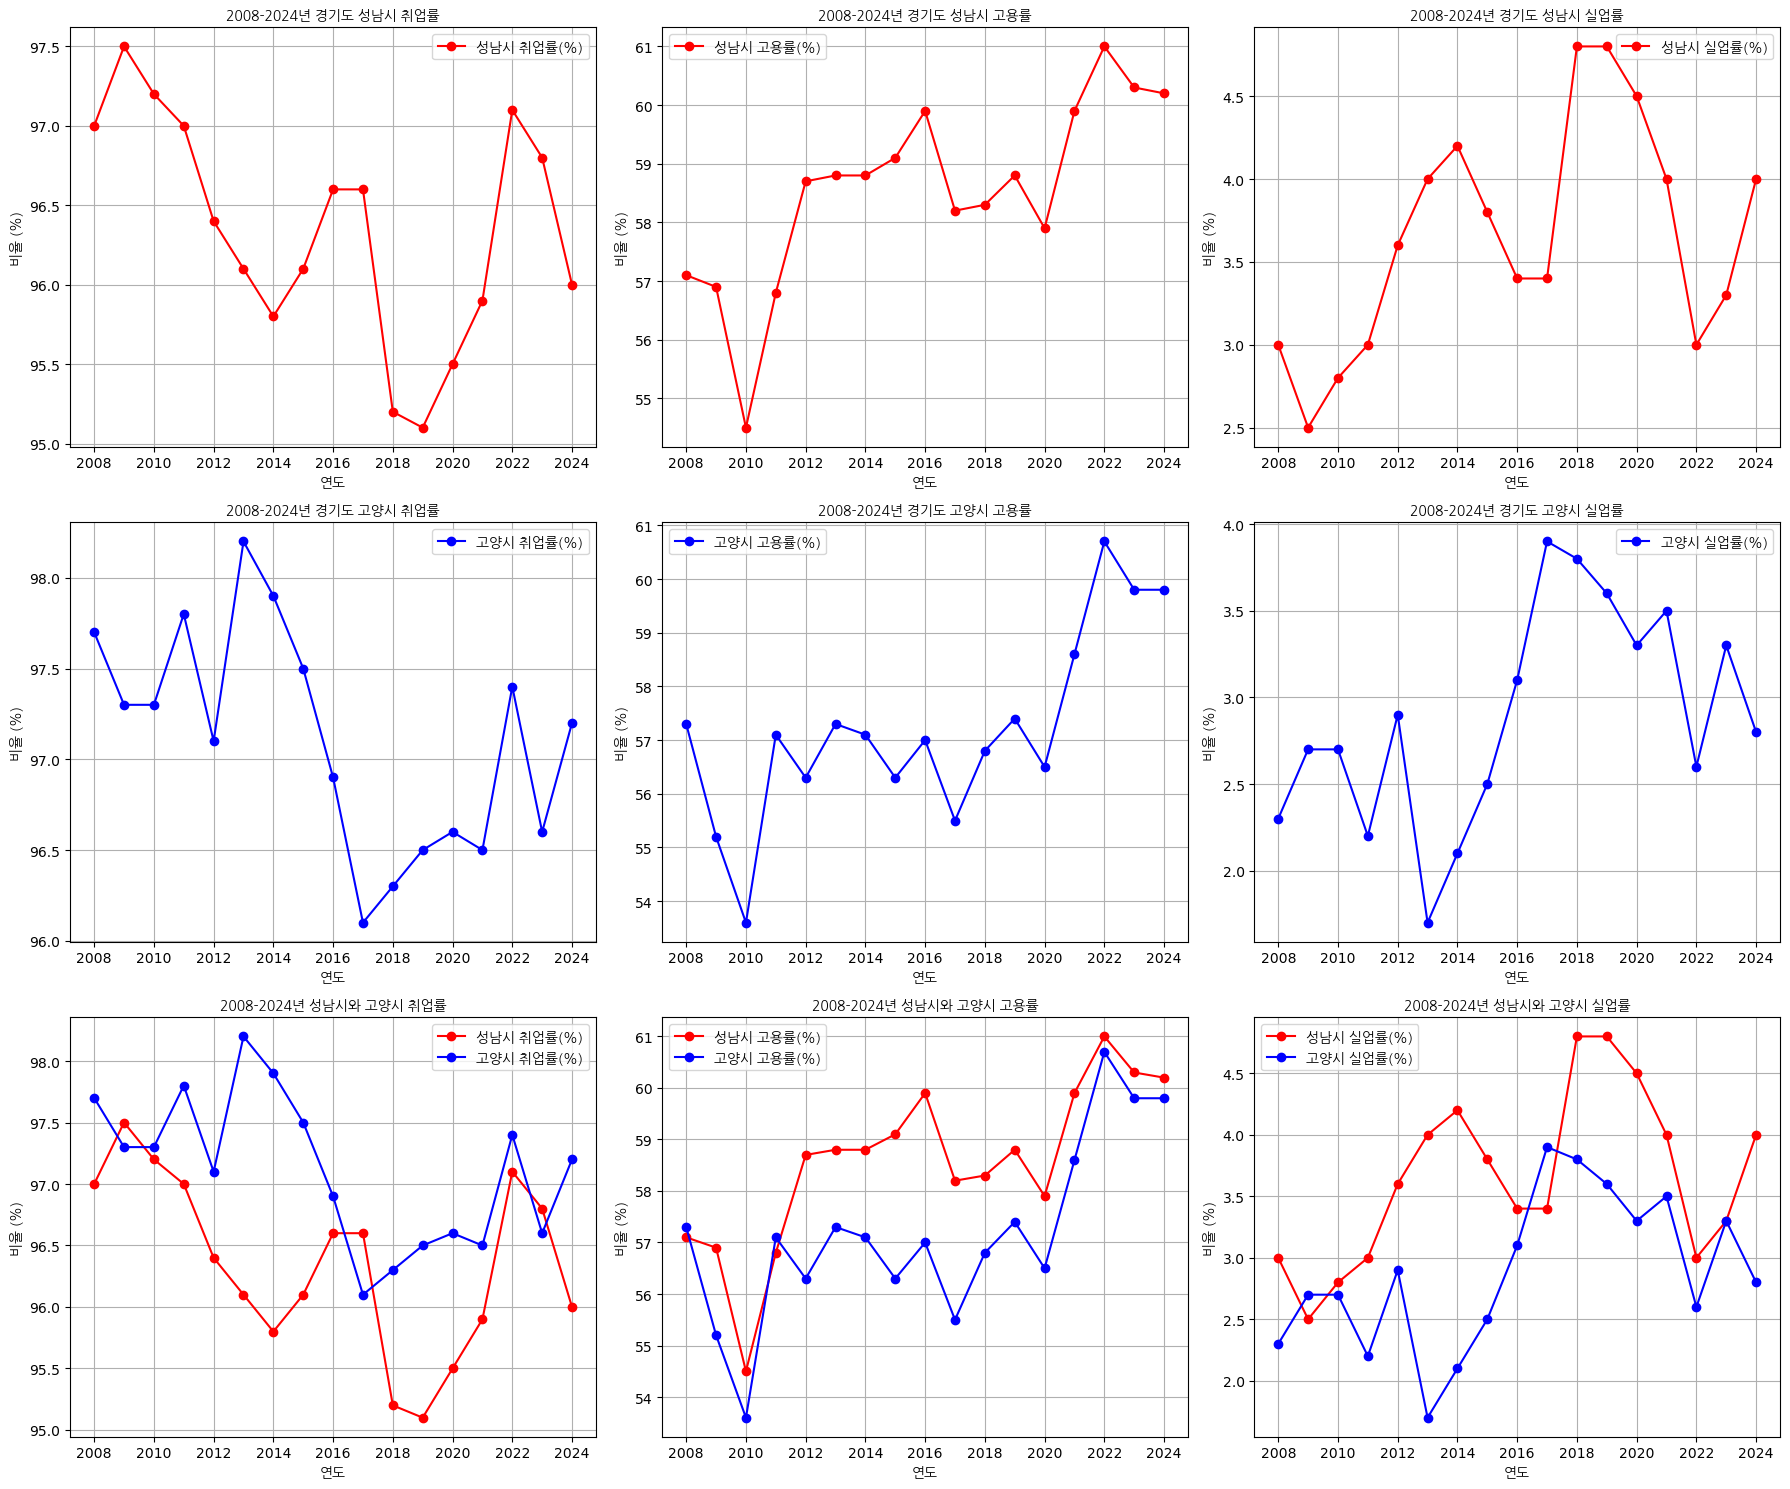

In [60]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Define the x-ticks to show every 2 years
xticks = df_seongnam_grouped['연도'][::2]
xticks_goyang = df_goyang_grouped['연도'][::2]

# Plot 성남시 취업률
axes[0, 0].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['취업률(%)'], marker='o', label='성남시 취업률(%)', color='red')
axes[0, 0].set_title('2008-2024년 경기도 성남시 취업률', fontproperties=fontprop)
axes[0, 0].set_xlabel('연도', fontproperties=fontprop)
axes[0, 0].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[0, 0].set_xticks(xticks)
axes[0, 0].legend(prop=fontprop, fontsize=12)
axes[0, 0].grid(True)

# Plot 성남시 고용률
axes[0, 1].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['고용률(%)'], marker='o', label='성남시 고용률(%)', color='red')
axes[0, 1].set_title('2008-2024년 경기도 성남시 고용률', fontproperties=fontprop)
axes[0, 1].set_xlabel('연도', fontproperties=fontprop)
axes[0, 1].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[0, 1].set_xticks(xticks)
axes[0, 1].legend(prop=fontprop, fontsize=12)
axes[0, 1].grid(True)

# Plot 성남시 실업률
axes[0, 2].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['실업률 ％)'], marker='o', label='성남시 실업률(%)', color='red')
axes[0, 2].set_title('2008-2024년 경기도 성남시 실업률', fontproperties=fontprop)
axes[0, 2].set_xlabel('연도', fontproperties=fontprop)
axes[0, 2].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[0, 2].set_xticks(xticks)
axes[0, 2].legend(prop=fontprop, fontsize=12)
axes[0, 2].grid(True)

# Plot 고양시 취업률
axes[1, 0].plot(df_goyang_grouped['연도'], df_goyang_grouped['취업률(%)'], marker='o', label='고양시 취업률(%)', color='blue')
axes[1, 0].set_title('2008-2024년 경기도 고양시 취업률', fontproperties=fontprop)
axes[1, 0].set_xlabel('연도', fontproperties=fontprop)
axes[1, 0].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[1, 0].set_xticks(xticks_goyang)
axes[1, 0].legend(prop=fontprop, fontsize=12)
axes[1, 0].grid(True)

# Plot 고양시 고용률
axes[1, 1].plot(df_goyang_grouped['연도'], df_goyang_grouped['고용률(%)'], marker='o', label='고양시 고용률(%)', color='blue')
axes[1, 1].set_title('2008-2024년 경기도 고양시 고용률', fontproperties=fontprop)
axes[1, 1].set_xlabel('연도', fontproperties=fontprop)
axes[1, 1].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[1, 1].set_xticks(xticks_goyang)
axes[1, 1].legend(prop=fontprop, fontsize=12)
axes[1, 1].grid(True)

# Plot 고양시 실업률
axes[1, 2].plot(df_goyang_grouped['연도'], df_goyang_grouped['실업률(％)'], marker='o', label='고양시 실업률(%)', color='blue')
axes[1, 2].set_title('2008-2024년 경기도 고양시 실업률', fontproperties=fontprop)
axes[1, 2].set_xlabel('연도', fontproperties=fontprop)
axes[1, 2].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[1, 2].set_xticks(xticks_goyang)
axes[1, 2].legend(prop=fontprop, fontsize=12)
axes[1, 2].grid(True)

# Plot 성남시와 고양시 취업률
axes[2, 0].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['취업률(%)'], marker='o', label='성남시 취업률(%)', color='red')
axes[2, 0].plot(df_goyang_grouped['연도'], df_goyang_grouped['취업률(%)'], marker='o', label='고양시 취업률(%)', color='blue')
axes[2, 0].set_title('2008-2024년 성남시와 고양시 취업률', fontproperties=fontprop)
axes[2, 0].set_xlabel('연도', fontproperties=fontprop)
axes[2, 0].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[2, 0].set_xticks(xticks)
axes[2, 0].legend(prop=fontprop, fontsize=12)
axes[2, 0].grid(True)

# Plot 성남시와 고양시 고용률
axes[2, 1].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['고용률(%)'], marker='o', label='성남시 고용률(%)', color='red')
axes[2, 1].plot(df_goyang_grouped['연도'], df_goyang_grouped['고용률(%)'], marker='o', label='고양시 고용률(%)', color='blue')
axes[2, 1].set_title('2008-2024년 성남시와 고양시 고용률', fontproperties=fontprop)
axes[2, 1].set_xlabel('연도', fontproperties=fontprop)
axes[2, 1].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[2, 1].set_xticks(xticks)
axes[2, 1].legend(prop=fontprop, fontsize=12)
axes[2, 1].grid(True)

# Plot 성남시와 고양시 실업률
axes[2, 2].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['실업률 ％)'], marker='o', label='성남시 실업률(%)', color='red')
axes[2, 2].plot(df_goyang_grouped['연도'], df_goyang_grouped['실업률(％)'], marker='o', label='고양시 실업률(%)', color='blue')
axes[2, 2].set_title('2008-2024년 성남시와 고양시 실업률', fontproperties=fontprop)
axes[2, 2].set_xlabel('연도', fontproperties=fontprop)
axes[2, 2].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[2, 2].set_xticks(xticks)
axes[2, 2].legend(prop=fontprop, fontsize=12)
axes[2, 2].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()